## Assignment: $k$ Means Clustering

### `! git clone https://github.com/ds3001f25/clustering_assignment.git`

### **Do two questions in total: "Q1+Q2" or "Q1+Q3"**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [1]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

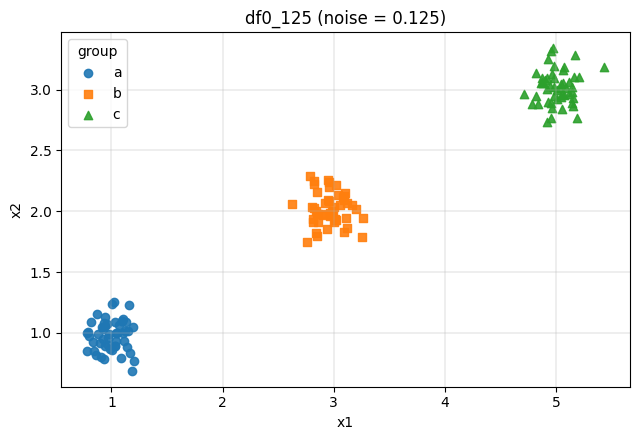

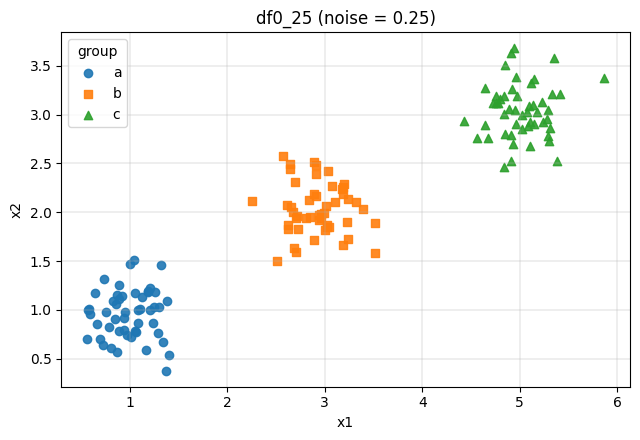

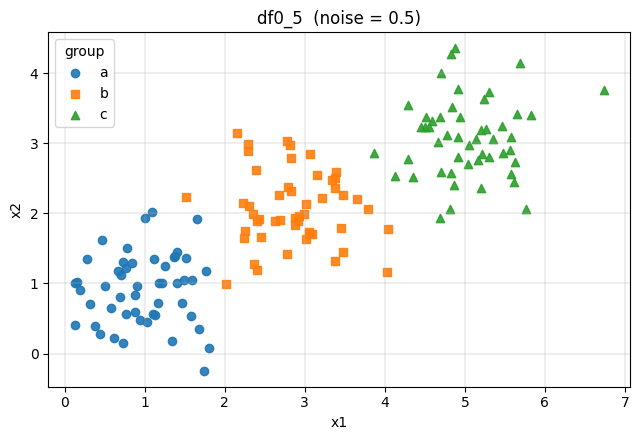

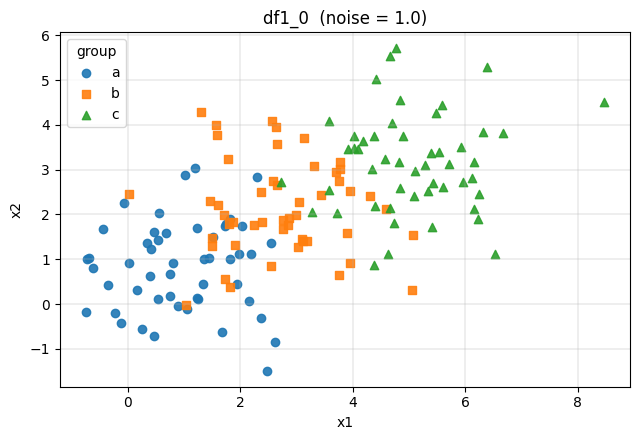

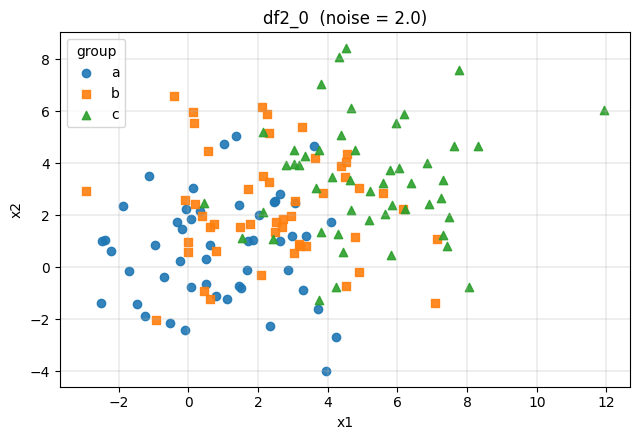

In [4]:
import matplotlib.pyplot as plt

def plot_by_group(df, title):
    markers = {"a":"o","b":"s","c":"^"}
    plt.figure(figsize=(6.5,4.5))
    for g, sub in df.groupby("group"):
        plt.scatter(sub["x1"], sub["x2"],
                    marker=markers.get(g, "o"),
                    alpha=0.9, label=g)
    plt.title(title)
    plt.xlabel("x1"); plt.ylabel("x2")
    plt.legend(title="group")
    plt.grid(True, linewidth=0.3)
    plt.tight_layout()
    plt.show()

plot_by_group(df0_125, "df0_125 (noise = 0.125)")
plot_by_group(df0_25,  "df0_25 (noise = 0.25)")
plot_by_group(df0_5,   "df0_5  (noise = 0.5)")
plot_by_group(df1_0,   "df1_0  (noise = 1.0)")
plot_by_group(df2_0,   "df2_0  (noise = 2.0)")


1.2 As noise increases I see the clusters start to become more sparse and overlap more.

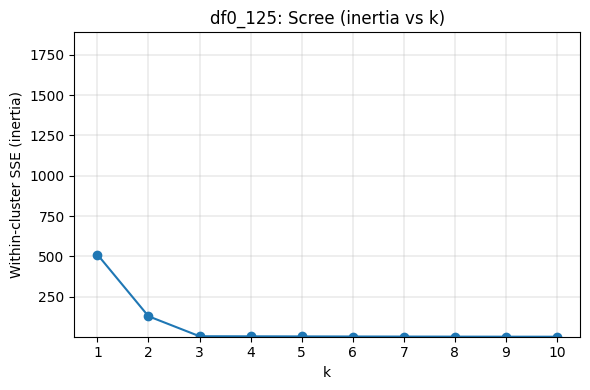

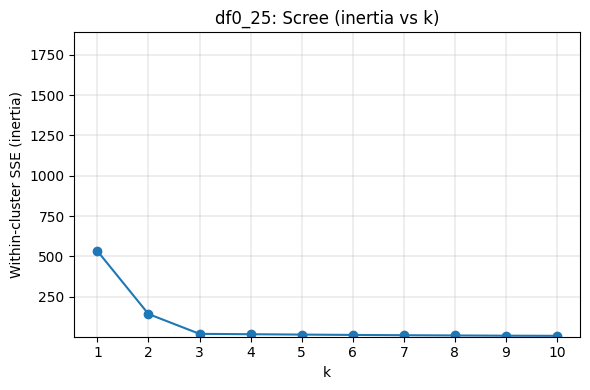

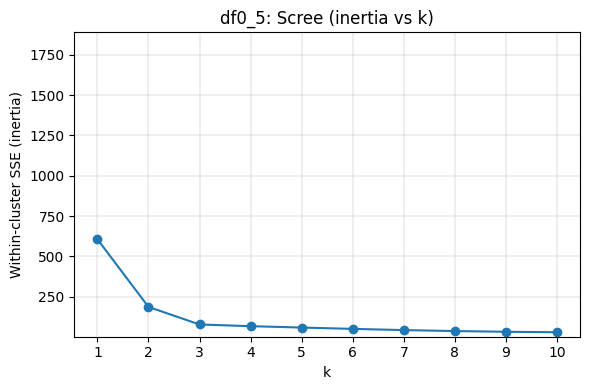

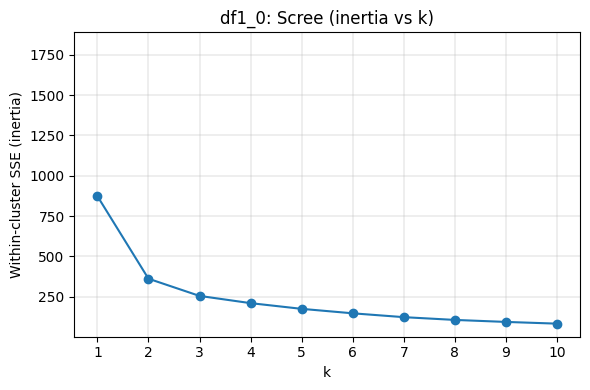

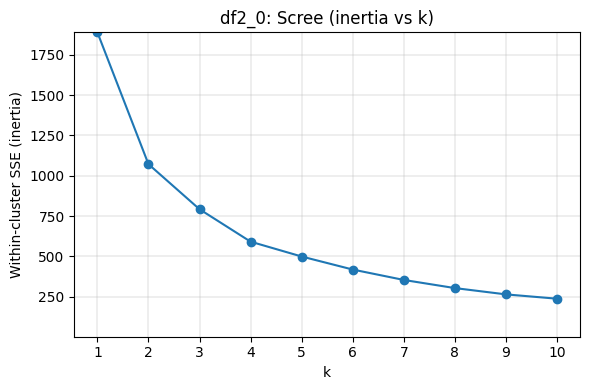

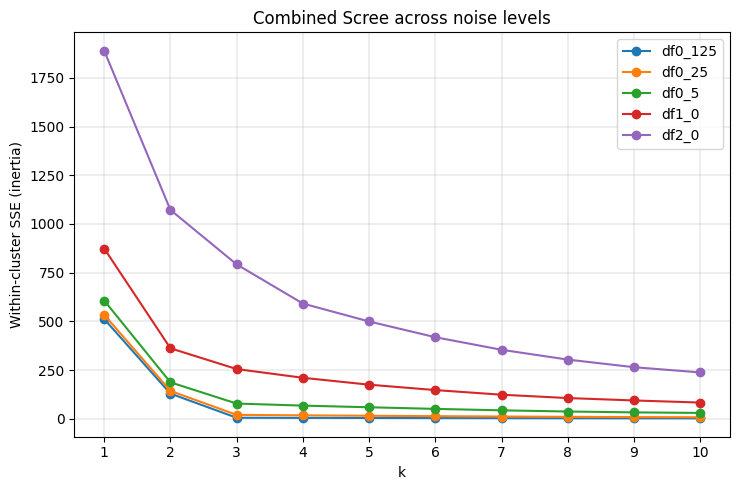

In [6]:
#1.3
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def inertia_curve(df, kmax=10, random_state=0):
    X = df[['x1','x2']].to_numpy()
    ks = np.arange(1, kmax+1)
    sse = []
    for k in ks:
        km = KMeans(n_clusters=k, n_init=20, random_state=random_state).fit(X)
        sse.append(km.inertia_)  # within-cluster SSE
    return ks, np.array(sse)

Individual scree plots
all_sse = {}
for name, d in {
    "df0_125": df0_125,
    "df0_25":  df0_25,
    "df0_5":   df0_5,
    "df1_0":   df1_0,
    "df2_0":   df2_0,
}.items():
    ks, sse = inertia_curve(d, kmax=10)
    all_sse[name] = (ks, sse)


ymin = min(s.min() for _, s in all_sse.values())
ymax = max(s.max() for _, s in all_sse.values())

for name, (ks, sse) in all_sse.items():
    plt.figure(figsize=(6,4))
    plt.plot(ks, sse, marker='o')
    plt.title(f"{name}: Scree (inertia vs k)")
    plt.xlabel("k"); plt.ylabel("Within-cluster SSE (inertia)")
    plt.xticks(ks); plt.ylim(ymin, ymax)
    plt.grid(True, linewidth=0.3); plt.tight_layout()
    plt.show()

#all curves on one canvas
plt.figure(figsize=(7.5,5))
for name, (ks, sse) in all_sse.items():
    plt.plot(ks, sse, marker='o', label=name)
plt.title("Combined Scree across noise levels")
plt.xlabel("k"); plt.ylabel("Within-cluster SSE (inertia)")
plt.xticks(ks); plt.grid(True, linewidth=0.3)
plt.legend(); plt.tight_layout()
plt.show()



1.3 
As noise increases, the scree lines rise and the elbow begins to get less clear. The curve becomes smoother and the drop in SSE for each additional cluster is less dramatic. This makes it much harder to confidently select a single k from the scree plot.

1.4
In my simulation, when the clusters were clear and noise was low, the scree plot had a sharp elbow at 
k = 3, making it easy to pick the right number of clusters. As I added more noise and the groups overlapped, the elbow faded and the plot became smoother, so it was much harder to tell which k to choose.


**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts? 
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the spending?

In [77]:
import pandas as pd
import numpy as np

PATH = "./data/SIPRI Military Expenditure Database.csv"

# Load and keep only 2020
df0 = pd.read_csv(PATH)
df = df0[df0["Year"] == 2020].copy()

# Keep only the columns we need
cols = [
    "Country",
    "Spending (2020 USD)",
    "Spending per Capita",
    "Percent of Government Spending",
    "Percent of GDP",
]

missing = [c for c in cols if c not in df.columns]
if missing:
    raise ValueError(f"Missing columns: {missing}")

df = df[cols]

# Drop rows with any missing values 
df = df.dropna().reset_index(drop=True)


for c in ["Spending (2020 USD)", "Spending per Capita", "Percent of Government Spending", "Percent of GDP"]:
    # Drop impossible negatives
    df = df[df[c] >= 0].copy()


print(len(df)) #check to see if same amount of rows as assignment 
df.head()



148


,Country,Spending (2020 USD),Spending per Capita,Percent of Government Spending,Percent of GDP
0,Afghanistan,279.576955,7.181899,0.049728,0.013589
1,Albania,187.433234,65.126211,0.037952,0.012583
2,Algeria,9708.277440,221.392384,0.173924,0.066600
3,Angola,993.594405,30.231680,0.074624,0.014442
4,Argentina,2830.929705,62.636731,0.017268,0.007269


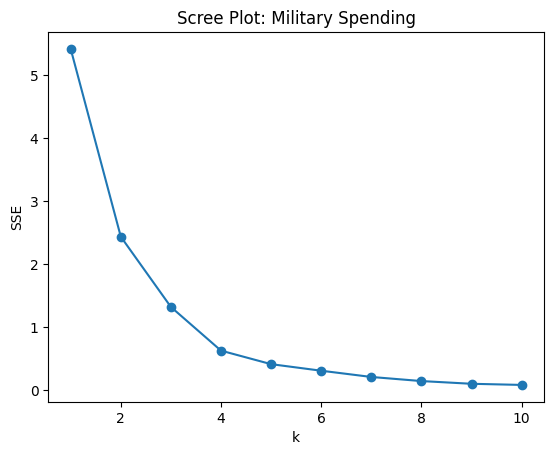

In [34]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load and filter data
sipri = pd.read_csv('./data/SIPRI Military Expenditure Database.csv')
sipri_2020 = sipri[sipri['Year'] == 2020].dropna()

# Max-min normalization
def maxmin(col):
    return (col - col.min()) / (col.max() - col.min())

sipri_2020['Spend_norm'] = maxmin(sipri_2020['Spending (2020 USD)'])
sipri_2020['PerCap_norm'] = maxmin(sipri_2020['Spending per Capita'])

X = sipri_2020[['Spend_norm', 'PerCap_norm']]
SSE = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(X)
    SSE.append(model.inertia_)
plt.plot(range(1, 11), SSE, marker='o')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Scree Plot: Military Spending')
plt.show()

from sklearn.cluster import KMeans




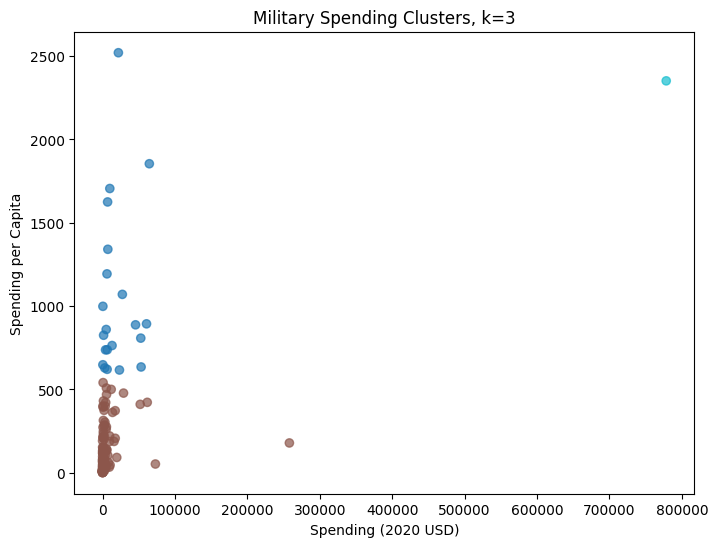

In [76]:
model = KMeans(n_clusters=3, n_init=10, random_state=0)
sipri_2020['cluster'] = model.fit_predict(X)
plt.figure(figsize=(8,6))
plt.scatter(sipri_2020['Spending (2020 USD)'],
            sipri_2020['Spending per Capita'],
            c=sipri_2020['cluster'], cmap='tab10', alpha=0.7)
plt.xlabel('Spending (2020 USD)')
plt.ylabel('Spending per Capita')
plt.title('Military Spending Clusters, k=3')
plt.show()

#decided k = 3

In [50]:
describe_table = sipri_2020.groupby('cluster')[['Spending (2020 USD)', 'Spending per Capita']].describe()
print(describe_table)


print(sipri_2020[sipri_2020['Country'] == 'United States of America'][['cluster', 'Spending (2020 USD)', 'Spending per Capita']])


        Spending (2020 USD)                                              \
                      count           mean           std            min   
cluster                                                                   
0                      21.0   19975.991473  21749.736747     405.790494   
1                     126.0    5943.346303  24858.961064       8.622460   
2                       1.0  778397.200000           NaN  778397.200000   

                                                                     \
                   25%            50%            75%            max   
cluster                                                               
0          4980.428135    7269.880030   27300.894701   64558.400000   
1           162.761743     580.758315    3225.333414  257973.429834   
2        778397.200000  778397.200000  778397.200000  778397.200000   

        Spending per Capita                                        \
                      count         mean         std 

From the describe table, Cluster 2 is a massive outlier with about $778B total spend and $2,352 per capita, which is the United States. Cluster 0 (about 21 countries) shows moderate total spending but high per-capita, which fits smaller, wealthier countries. Cluster 1 (about 126 countries) has low totals and low per-capita, representing the broad group of typical or lower spenders. This pattern highlights just how much the US stands apart in military spending, while most countries spend far less, both in total and per person

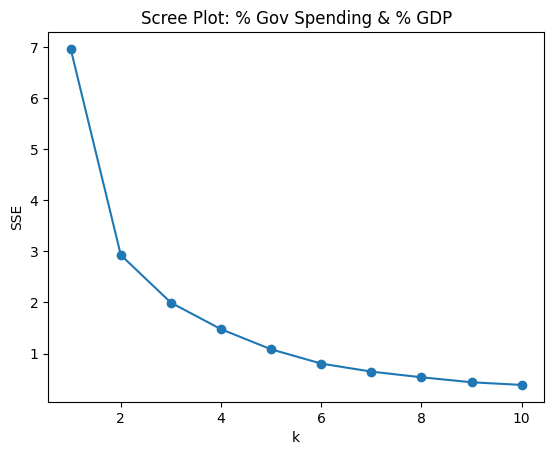

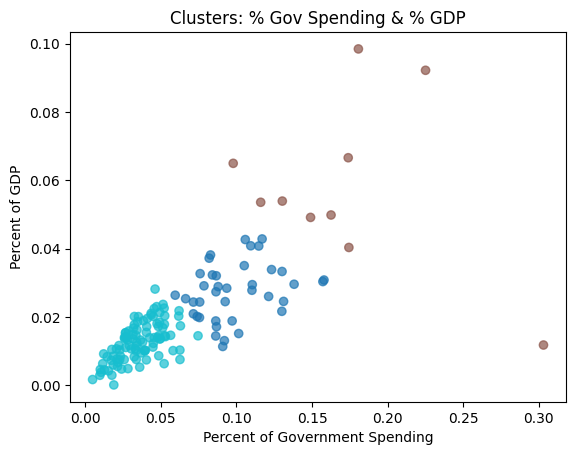

         Percent of Government Spending                                \
                                  count      mean       std       min   
cluster2                                                                
0                                  39.0  0.098683  0.024125  0.059520   
1                                  10.0  0.171289  0.058725  0.097882   
2                                  99.0  0.035777  0.014549  0.004896   

                                                 Percent of GDP            \
               25%       50%       75%       max          count      mean   
cluster2                                                                    
0         0.082430  0.092044  0.112633  0.157918           39.0  0.027412   
1         0.135010  0.168248  0.179081  0.303027           10.0  0.058071   
2         0.025921  0.034261  0.047402  0.074624           99.0  0.012664   

                                                                      
               std       mi

In [73]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


# Max-min
scaler = MinMaxScaler()
sipri_2020[['GovPct_norm', 'GDPpct_norm']] = scaler.fit_transform(
    sipri_2020[['Percent of Government Spending', 'Percent of GDP']]
)

# Scree plot to find k
X2 = sipri_2020[['GovPct_norm', 'GDPpct_norm']]
SSE2 = []
for k in range(1,11):
    model2 = KMeans(n_clusters=k, n_init=10, random_state=0)
    model2.fit(X2)
    SSE2.append(model2.inertia_)
plt.plot(range(1, 11), SSE2, marker='o')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Scree Plot: % Gov Spending & % GDP')
plt.show()
model2 = KMeans(n_clusters=3, n_init=10, random_state=0)
sipri_2020['cluster2'] = model2.fit_predict(X2)

# Scatter plot
plt.scatter(sipri_2020['Percent of Government Spending'],
            sipri_2020['Percent of GDP'],
            c=sipri_2020['cluster2'], cmap='tab10', alpha=0.7)
plt.xlabel('Percent of Government Spending')
plt.ylabel('Percent of GDP')
plt.title('Clusters: % Gov Spending & % GDP')
plt.show()

# Describe table 
print(sipri_2020.groupby('cluster2')[['Percent of Government Spending', 'Percent of GDP']].describe())

print(sipri_2020[sipri_2020['Country'] == 'United States of America'][['Percent of Government Spending', 'Percent of GDP', 'cluster2']])





Most countries fall into a large, low-burden cluster, where the military makes up a small share of both the government budget and GDP. A medium sized group spends a higher share of their resources on the military, but not at the extreme. And lastly, a small group stands out for sharing a very large portion of their budget and economy to military spending. The United States is in the moderateburden cluster where it spends a significant share of its budget and GDP on the military, it is not an outlier. This is a big contrast to clustering by total spending, where the US was a massive outlier and was in its own cluster.

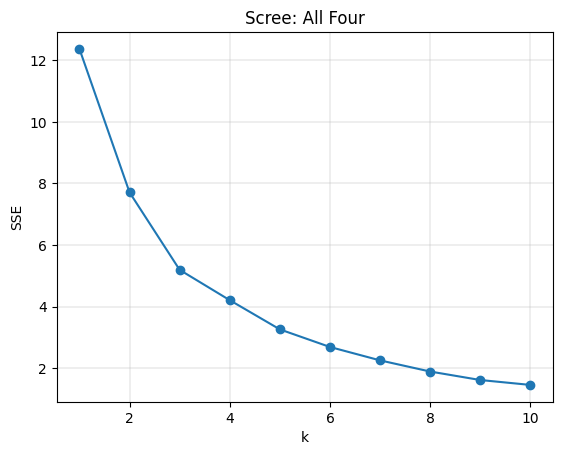

In [71]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# max-min
sipri_2020['Spend_norm'] = maxmin(sipri_2020['Spending (2020 USD)'])
sipri_2020['PerCap_norm'] = maxmin(sipri_2020['Spending per Capita'])
sipri_2020['PctGov_norm'] = maxmin(sipri_2020['Percent of Government Spending'])
sipri_2020['PctGDP_norm'] = maxmin(sipri_2020['Percent of GDP'])

X_all = sipri_2020[['Spend_norm','PerCap_norm','PctGov_norm','PctGDP_norm']]

# to choose k
SSE_all = []
for k in range(1, 11):
    m = KMeans(n_clusters=k, n_init=10, random_state=0).fit(X_all)
    SSE_all.append(m.inertia_)
plt.plot(range(1, 11), SSE_all, marker='o')
plt.xlabel('k'); plt.ylabel('SSE')
plt.title('Scree: All Four')
plt.grid(True, linewidth=0.3)
plt.show()

In [67]:
model = KMeans(n_clusters=3, n_init=10, random_state=0)
sipri_2020['cluster_all'] = model.fit_predict(X_all)

print(sipri_2020.groupby('cluster_all')[['Spending (2020 USD)', 'Spending per Capita', 'Percent of Government Spending', 'Percent of GDP']].describe())

sipri_2020.loc[sipri_2020['Country'].str.strip().str.lower() == 'united states of america'.lower(), ['Country', 'cluster_all']]


            Spending (2020 USD)                                             \
                          count           mean            std          min   
cluster_all                                                                  
0                         111.0    7086.472777   26479.379918     8.622460   
1                          31.0    8786.086602   17901.909108   162.373364   
2                           6.0  147964.582042  309635.189564  6095.708713   

                                                                     \
                     25%           50%           75%            max   
cluster_all                                                           
0             130.010211    567.650747   3910.107493  257973.429834   
1             467.787851   1404.787234   7739.166193   72937.064048   
2            7700.424616  15897.570598  53872.942442  778397.200000   

            Spending per Capita               ...  \
                          count         mean  ...  

,Country,cluster_all
5540,United States of America,2


With all four variables, the clusters are more blended and nuanced. The US and a few others are still grouped together at the top, but some countries with high military burden (even if their total spending is lower) may now be grouped with large spenders. The clusters reflect both absolute and relative military spending, so you see a mix of countries that are extreme in either or both ways.

Yes. The k-means clustering algorithm did find useful patterns in analyzing the spending data. By grouping countries using all four variables, the algorithm revealed clusters that reflect both the scale and the priority of military spending. This approach helped identify just the biggest spenders and also countries where military spending is a major national focus. k-means helped me see which countries are similar when considering both how much they spend and how much of their resources go to defense which gives a view of global military spending.